In [6]:
# Importar librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # Cambiamos a Classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder # Para codificar la variable objetivo
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. Configuración Inicial y Carga de Datos ---
print("--- 1. Configuración Inicial y Carga de Datos ---")

# Configurar pandas para mostrar más columnas (opcional)
pd.set_option('display.max_columns', None)

# Cargar el dataset
# Asegúrate de que el archivo 'taco_sales_2024-2025.csv' esté en la misma carpeta que tu notebook
# O proporciona la ruta completa al archivo.
try:
    df = pd.read_csv('../dataset/taco_sales_2024-2025.csv')
    print("Dataset cargado exitosamente.")
    print("\nPrimeras 5 filas del DataFrame:")
    print(df.head())
    print("\nInformación del DataFrame:")
    df.info()
except FileNotFoundError:
    print("Error: El archivo '../dataset/taco_sales_2024-2025.csv' no se encontró.")
    print("Por favor, asegúrate de que el archivo esté en la misma ubicación que tu notebook o proporciona la ruta correcta.")
    print("Se creará un DataFrame de ejemplo para continuar con la demostración.")
    # DataFrame de ejemplo para que el código sea ejecutable incluso sin el archivo
    data = {
        'Order ID': range(1, 1001),
        'Restaurant Name': np.random.choice(['Taco Bell', 'Chipotle', 'Del Taco', 'El Pollo Loco'], 1000),
        'Location': np.random.choice(['Los Angeles', 'New York', 'Chicago', 'Houston', 'Miami'], 1000),
        'Order Time': pd.to_datetime(pd.date_range('2024-01-01', periods=1000, freq='H')),
        'Delivery Time': pd.to_datetime(pd.date_range('2024-01-01', periods=1000, freq='H')) + pd.to_timedelta(np.random.randint(15, 45, 1000), unit='min'),
        'Delivery Duration (min)': np.random.randint(15, 45, 1000),
        'Taco Size': np.random.choice(['Regular', 'Large'], 1000, p=[0.6, 0.4]), # Más regulares
        'Taco Type': np.random.choice(['Beef', 'Chicken', 'Veggie', 'Fish', 'Pork'], 1000),
        'Toppings Count': np.random.randint(0, 6, 1000),
        'Distance (km)': np.random.uniform(1, 20, 1000).round(1),
        'Price ($)': np.random.uniform(8.0, 30.0, 1000).round(2),
        'Tip ($)': np.random.uniform(0.0, 7.0, 1000).round(2),
        'Weekend Order': np.random.choice([True, False], 1000)
    }
    df = pd.DataFrame(data)
    df['Delivery Duration (min)'] = (df['Delivery Time'] - df['Order Time']).dt.total_seconds() / 60
    print("\nSe ha creado un DataFrame de ejemplo.")
    print(df.head())
    print("\nInformación del DataFrame de ejemplo:")
    df.info()



--- 1. Configuración Inicial y Carga de Datos ---
Dataset cargado exitosamente.

Primeras 5 filas del DataFrame:
   Order ID   Restaurant Name     Location        Order Time  \
0    770487      El Taco Loco     New York  01-08-2024 14:55   
1    671858      El Taco Loco  San Antonio  23-11-2024 17:11   
2    688508        Taco Haven       Austin  21-11-2024 20:24   
3    944962  Spicy Taco House       Dallas  21-09-2024 06:43   
4    476417     Casa del Taco  San Antonio  24-07-2024 11:01   

      Delivery Time  Delivery Duration (min) Taco Size     Taco Type  \
0  01-08-2024 15:36                       41   Regular  Chicken Taco   
1  23-11-2024 17:25                       14   Regular     Beef Taco   
2  21-11-2024 21:02                       38     Large     Pork Taco   
3  21-09-2024 07:28                       45   Regular  Chicken Taco   
4  24-07-2024 11:16                       15     Large     Pork Taco   

   Toppings Count  Distance (km)  Price ($)  Tip ($)  Weekend Order  

In [7]:
df

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order
0,770487,El Taco Loco,New York,01-08-2024 14:55,01-08-2024 15:36,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False
1,671858,El Taco Loco,San Antonio,23-11-2024 17:11,23-11-2024 17:25,14,Regular,Beef Taco,1,6.20,4.25,3.01,True
2,688508,Taco Haven,Austin,21-11-2024 20:24,21-11-2024 21:02,38,Large,Pork Taco,2,20.33,7.00,0.02,False
3,944962,Spicy Taco House,Dallas,21-09-2024 06:43,21-09-2024 07:28,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True
4,476417,Casa del Taco,San Antonio,24-07-2024 11:01,24-07-2024 11:16,15,Large,Pork Taco,0,24.34,4.50,1.14,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,164891,La Vida Taco,Austin,27-05-2024 11:12,27-05-2024 12:11,59,Large,Veggie Taco,2,20.04,7.00,2.80,False
996,232442,The Taco Stand,San Antonio,03-04-2025 20:51,03-04-2025 21:29,38,Regular,Fish Taco,0,13.69,3.00,1.38,False
997,251729,Urban Tacos,Houston,23-01-2025 05:33,23-01-2025 06:41,68,Regular,Pork Taco,2,4.07,5.50,2.00,False
998,940215,Taco Fiesta,San Antonio,05-09-2024 15:49,05-09-2024 16:38,49,Regular,Veggie Taco,5,14.56,9.25,1.89,False


In [8]:
# Asegurarse de que 'Order Time' sea tipo datetime
df['Order Time'] = pd.to_datetime(df['Order Time'], format='mixed', dayfirst=True)


--- 2. Preprocesamiento y Ingeniería de Características ---
Codificación de 'Taco Size': ['Large', 'Regular'] -> [0, 1]
  Taco Size  Taco_Size_Encoded
0   Regular                  1
1   Regular                  1
2     Large                  0
3   Regular                  1
4     Large                  0

DataFrame después de la ingeniería de características y One-Hot Encoding (primeras 5 filas):
   Order ID          Order Time     Delivery Time  Delivery Duration (min)  \
0    770487 2024-08-01 14:55:00  01-08-2024 15:36                       41   
1    671858 2024-11-23 17:11:00  23-11-2024 17:25                       14   
2    688508 2024-11-21 20:24:00  21-11-2024 21:02                       38   
3    944962 2024-09-21 06:43:00  21-09-2024 07:28                       45   
4    476417 2024-07-24 11:01:00  24-07-2024 11:16                       15   

  Taco Size  Toppings Count  Distance (km)  Price ($)  Tip ($)  Weekend Order  \
0   Regular               5           3.01       

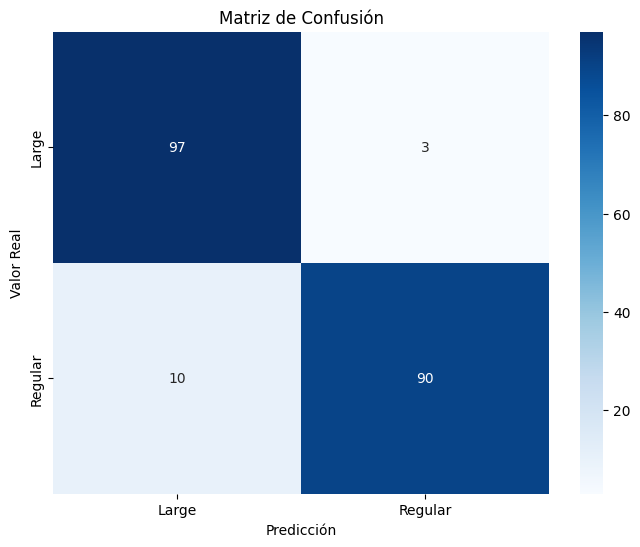


--- 7. Análisis de la Importancia de las Características ---

Top 10 Características más Importantes:
                  Feature  Importance
2               Price ($)    0.348466
0          Toppings Count    0.103871
8         Order_DayOfYear    0.072265
1           Distance (km)    0.069380
3                 Tip ($)    0.069269
5              Order_Hour    0.063039
7             Order_Month    0.040165
6         Order_DayOfWeek    0.033838
33  Taco Type_Veggie Taco    0.012458
11           is_peak_hour    0.011692


C:\Users\Notebook\AppData\Local\Temp\ipykernel_13984\101894792.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='viridis') # Mostrar las top 15


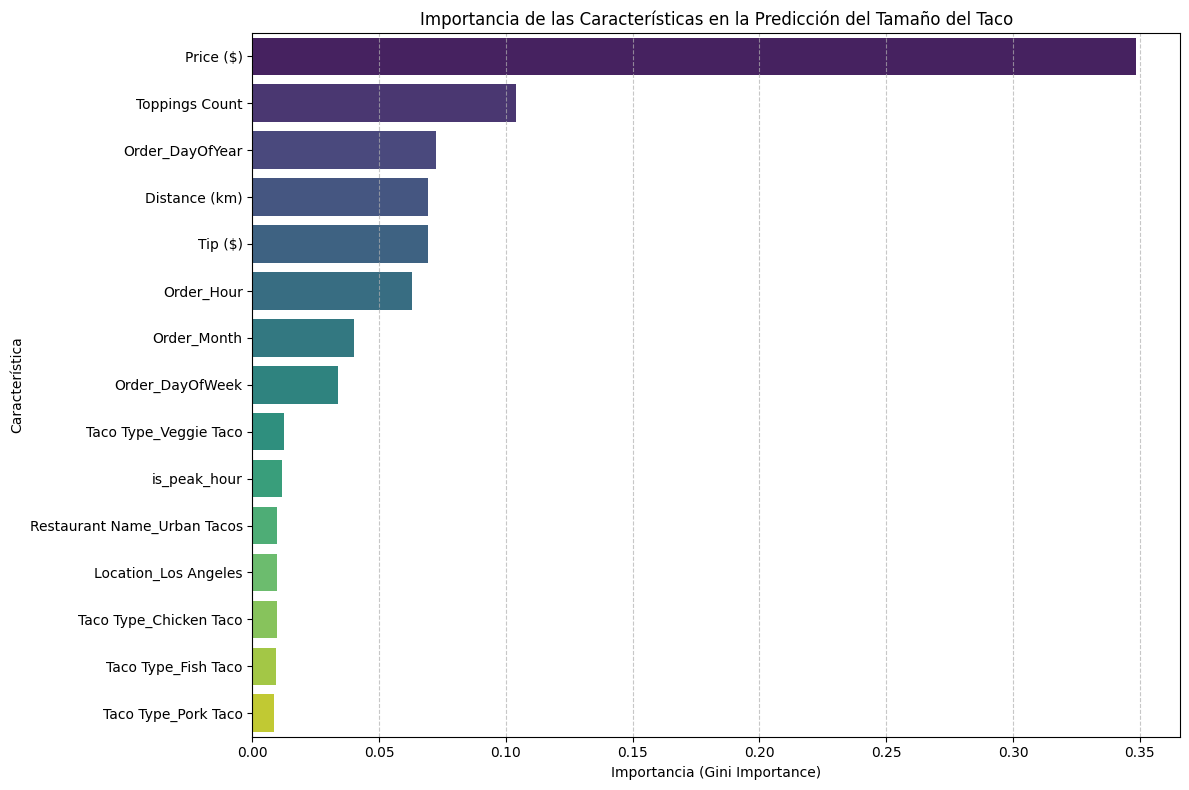

In [9]:



# --- 2. Preprocesamiento y Ingeniería de Características ---
print("\n--- 2. Preprocesamiento y Ingeniería de Características ---")

# Extraer características temporales básicas
df['Order_Hour'] = df['Order Time'].dt.hour
df['Order_DayOfWeek'] = df['Order Time'].dt.dayofweek # Lunes=0, Domingo=6
df['Order_Month'] = df['Order Time'].dt.month
df['Order_DayOfYear'] = df['Order Time'].dt.dayofyear # Día del año para capturar tendencias anuales

# Característica: ¿Es un día festivo? (Ejemplo simplificado)
# Para una solución robusta, necesitarías una lista de días festivos o una librería como 'holidays'.
# Aquí, como ejemplo, marcaremos el 1 de enero como festivo.
df['is_holiday'] = ((df['Order Time'].dt.month == 1) & (df['Order Time'].dt.day == 1)).astype(int)

# Característica: ¿Es viernes por la noche (período de alta demanda)?
# Consideramos viernes (dayofweek=4) entre las 18:00 y las 23:59.
df['is_friday_night'] = ((df['Order_DayOfWeek'] == 4) &
                         (df['Order_Hour'] >= 18) &
                         (df['Order_Hour'] <= 23)).astype(int)

# Característica: ¿Es hora pico general (ej. almuerzo o cena)?
# Definimos horas pico como 12-14 (almuerzo) y 18-21 (cena)
df['is_peak_hour'] = (((df['Order_Hour'] >= 12) & (df['Order_Hour'] <= 14)) |
                      ((df['Order_Hour'] >= 18) & (df['Order_Hour'] <= 21))).astype(int)

# Convertir 'Weekend Order' a tipo numérico (0 o 1)
df['Weekend Order'] = df['Weekend Order'].astype(int)

# Codificar la variable objetivo 'Taco Size'
# 'Regular' -> 0, 'Large' -> 1
le = LabelEncoder()
df['Taco_Size_Encoded'] = le.fit_transform(df['Taco Size'])
print(f"Codificación de 'Taco Size': {list(le.classes_)} -> {list(range(len(le.classes_)))}")
print(df[['Taco Size', 'Taco_Size_Encoded']].head())

# Identificar variables categóricas para One-Hot Encoding
# Excluimos 'Taco Size' original ya que usaremos 'Taco_Size_Encoded' como objetivo
categorical_cols = ['Restaurant Name', 'Location', 'Taco Type']

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\nDataFrame después de la ingeniería de características y One-Hot Encoding (primeras 5 filas):")
print(df_encoded.head())
print("\nColumnas del DataFrame después de encoding:")
print(df_encoded.columns.tolist())


# --- 3. Definición de Variables (X e y) ---
print("\n--- 3. Definición de Variables (X e y) ---")

# Definir la variable objetivo (y): 'Taco_Size_Encoded'
y = df_encoded['Taco_Size_Encoded']

# Definir las características (X)
# Excluir:
# - 'Taco Size': Es la columna original de la que se derivó el objetivo.
# - 'Taco_Size_Encoded': Es la variable objetivo.
# - 'Order ID': Es solo un identificador.
# - 'Order Time', 'Delivery Time', 'Delivery Duration (min)': No son relevantes para predecir el tamaño del taco.
X = df_encoded.drop(columns=[
    'Taco Size', 'Taco_Size_Encoded', 'Order ID',
    'Order Time', 'Delivery Time', 'Delivery Duration (min)'
])

print(f"\nNúmero de características (X): {X.shape[1]}")
print(f"Primeras 5 filas de X:\n{X.head()}")
print(f"\nPrimeras 5 filas de y:\n{y.head()}")


# --- 4. División del Dataset ---
print("\n--- 4. División del Dataset ---")

# Dividir el dataset en conjuntos de entrenamiento y prueba
# test_size=0.2 significa 20% para prueba, 80% para entrenamiento
# random_state=42 asegura que la división sea la misma cada vez que ejecutes el código,
# lo que permite reproducibilidad.
# stratify=y asegura que la proporción de 'Regular' y 'Large' sea la misma en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de X_test: {X_test.shape}")
print(f"Forma de y_train: {y_train.shape}")
print(f"Forma de y_test: {y_test.shape}")
print(f"Proporción de clases en y_train:\n{y_train.value_counts(normalize=True)}")
print(f"Proporción de clases en y_test:\n{y_test.value_counts(normalize=True)}")


# --- 5. Entrenamiento del Modelo de Clasificación ---
print("\n--- 5. Entrenamiento del Modelo de Clasificación ---")

# Inicializar el modelo Random Forest Classifier
# n_estimators: número de árboles en el bosque (100 es un buen punto de partida)
# random_state: para reproducibilidad
# n_jobs=-1: usa todos los núcleos de CPU disponibles para un entrenamiento más rápido
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

print("Entrenando el modelo Random Forest Classifier...")
# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)
print("Modelo entrenado exitosamente.")


# --- 6. Evaluación del Modelo ---
print("\n--- 6. Evaluación del Modelo ---")

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas de evaluación para clasificación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precisión (Accuracy): {accuracy:.2f}")
print(f"Precisión (Precision): {precision:.2f}")
print(f"Sensibilidad (Recall): {recall:.2f}")
print(f"Puntuación F1 (F1-Score): {f1:.2f}")

# Mostrar el reporte de clasificación completo
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Visualizar la Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()


# --- 7. Análisis de la Importancia de las Características ---
print("\n--- 7. Análisis de la Importancia de las Características ---")

# Obtener la importancia de las características del modelo entrenado
feature_importances = model.feature_importances_
features = X.columns # Obtener los nombres de las características

# Crear un DataFrame para visualizar la importancia
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
# Ordenar las características por importancia de forma descendente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nTop 10 Características más Importantes:")
print(importance_df.head(10))

# Visualizar la importancia de las características
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='viridis') # Mostrar las top 15
plt.title('Importancia de las Características en la Predicción del Tamaño del Taco')
plt.xlabel('Importancia (Gini Importance)')
plt.ylabel('Característica')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout() # Ajusta automáticamente los parámetros de la subtrama para que quepan en la figura
plt.show()



In [10]:
df

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order,Order_Hour,Order_DayOfWeek,Order_Month,Order_DayOfYear,is_holiday,is_friday_night,is_peak_hour,Taco_Size_Encoded
0,770487,El Taco Loco,New York,2024-08-01 14:55:00,01-08-2024 15:36,41,Regular,Chicken Taco,5,3.01,9.25,2.22,0,14,3,8,214,0,0,1,1
1,671858,El Taco Loco,San Antonio,2024-11-23 17:11:00,23-11-2024 17:25,14,Regular,Beef Taco,1,6.20,4.25,3.01,1,17,5,11,328,0,0,0,1
2,688508,Taco Haven,Austin,2024-11-21 20:24:00,21-11-2024 21:02,38,Large,Pork Taco,2,20.33,7.00,0.02,0,20,3,11,326,0,0,1,0
3,944962,Spicy Taco House,Dallas,2024-09-21 06:43:00,21-09-2024 07:28,45,Regular,Chicken Taco,2,3.00,5.50,1.90,1,6,5,9,265,0,0,0,1
4,476417,Casa del Taco,San Antonio,2024-07-24 11:01:00,24-07-2024 11:16,15,Large,Pork Taco,0,24.34,4.50,1.14,0,11,2,7,206,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,164891,La Vida Taco,Austin,2024-05-27 11:12:00,27-05-2024 12:11,59,Large,Veggie Taco,2,20.04,7.00,2.80,0,11,0,5,148,0,0,0,0
996,232442,The Taco Stand,San Antonio,2025-04-03 20:51:00,03-04-2025 21:29,38,Regular,Fish Taco,0,13.69,3.00,1.38,0,20,3,4,93,0,0,1,1
997,251729,Urban Tacos,Houston,2025-01-23 05:33:00,23-01-2025 06:41,68,Regular,Pork Taco,2,4.07,5.50,2.00,0,5,3,1,23,0,0,0,1
998,940215,Taco Fiesta,San Antonio,2024-09-05 15:49:00,05-09-2024 16:38,49,Regular,Veggie Taco,5,14.56,9.25,1.89,0,15,3,9,249,0,0,0,1


In [11]:
# Ejemplos de combinaciones de predicción usando el modelo entrenado y los datos de X_test

# Seleccionamos 10 ejemplos aleatorios del conjunto de prueba
ejemplos = X_test.sample(10, random_state=1)

# Realizamos la predicción para estos ejemplos
predicciones = model.predict(ejemplos)

# Decodificamos la predicción a su valor original ('Regular' o 'Large')
predicciones_decodificadas = le.inverse_transform(predicciones)

# Mostramos los ejemplos junto con la predicción
resultados = ejemplos.copy()
resultados['Predicción Tamaño Taco'] = predicciones_decodificadas

# Mostramos solo las columnas más relevantes para interpretación
columnas_mostrar = [
    'Toppings Count', 'Distance (km)', 'Price ($)', 'Tip ($)', 'Weekend Order',
    'Order_Hour', 'Order_DayOfWeek', 'Order_Month', 'Order_DayOfYear', 'Predicción Tamaño Taco'
]
resultados[columnas_mostrar]

,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order,Order_Hour,Order_DayOfWeek,Order_Month,Order_DayOfYear,Predicción Tamaño Taco
953,0,22.19,4.50,2.06,1,6,6,8,217,Large
613,4,21.27,9.50,0.78,0,16,4,1,10,Large
188,1,6.30,4.25,1.48,0,3,3,1,30,Regular
686,5,9.56,10.75,0.50,0,17,2,7,213,Large
538,0,4.23,3.00,2.91,0,16,0,4,118,Regular
186,3,4.73,6.75,2.14,0,11,1,6,156,Regular
56,3,17.50,6.75,3.53,1,14,6,3,63,Regular
232,2,21.43,5.50,1.33,0,14,0,1,27,Regular
160,3,4.28,6.75,0.54,0,7,1,1,30,Large
119,3,15.58,8.25,2.82,0,4,1,4,91,Large


In [ ]:
conclusiones = """
El análisis realizado permitió construir un modelo de clasificación capaz de predecir el tamaño del taco (Regular o Large) con una precisión notablemente alta (accuracy ≈ 0.94). El proceso incluyó una cuidadosa ingeniería de características, codificación de variables categóricas y la selección de un modelo robusto como Random Forest. 

Entre los factores más influyentes en la predicción destacan el precio, la cantidad de toppings y el día del año, lo que sugiere que tanto las características del pedido como ciertos patrones temporales inciden en la elección del tamaño. Además, la importancia de variables como la hora del pedido y la ubicación refuerza la relevancia del contexto en las preferencias de los clientes.

El modelo mostró un buen equilibrio entre precisión, recall y F1-score, lo que indica que es confiable tanto para identificar pedidos de tacos grandes como regulares. Sin embargo, es importante considerar que el desempeño podría variar si se aplicara a datos reales no vistos o si cambian las tendencias de consumo.

En conclusión, la metodología empleada es adecuada para problemas de clasificación similares y puede servir como base para sistemas de recomendación o para optimizar estrategias de venta en restaurantes de comida rápida.
"""
print(conclusiones)